In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pty
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
import missingno as mis

In [3]:
data = pd.read_csv("Algerian_forestFores.csv")
data.head(2)

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire


In [4]:
data.columns

Index(['Bejaia Region Dataset '], dtype='object')

In [6]:
df = data["Bejaia Region Dataset "].index
df

MultiIndex([('day', 'month', 'year', 'Temperature', ' RH', ' Ws', ...),
            ( '01',    '06', '2012',          '29',  '57',  '18', ...),
            ( '02',    '06', '2012',          '29',  '61',  '13', ...),
            ( '03',    '06', '2012',          '26',  '82',  '22', ...),
            ( '04',    '06', '2012',          '25',  '89',  '13', ...),
            ( '05',    '06', '2012',          '27',  '77',  '16', ...),
            ( '06',    '06', '2012',          '31',  '67',  '14', ...),
            ( '07',    '06', '2012',          '33',  '54',  '13', ...),
            ( '08',    '06', '2012',          '30',  '73',  '15', ...),
            ( '09',    '06', '2012',          '25',  '88',  '13', ...),
            ...
            ( '21',    '09', '2012',          '35',  '34',  '17', ...),
            ( '22',    '09', '2012',          '33',  '64',  '13', ...),
            ( '23',    '09', '2012',          '35',  '56',  '14', ...),
            ( '24',    '09', '2012',          '2

- Observation:
    1. Independent Feature and "Data" is in index of csv file, Dependent Feature is in Values. 
    2. First row of Data contain all feature name, rest contain data which need to Process.
    2. This Dataset Contain two different Dependent Features, one for Regression Problem - "Tempreature" and another for
        Classification Problem - "Classes".

In [7]:
#Dependent Feature
y = data.values
y.shape

(247, 1)

In [8]:
#Independent Feature
Algeria_df = pd.DataFrame.from_records(df[1:],columns=df[0])
Algeria_df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1


In [9]:
Algeria_df["Classes"] = y[1:]

In [10]:
Algeria_df.shape

(246, 14)

In [11]:
Algeria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


 - Converting Object into suitable data type int and float

In [12]:
for feature in Algeria_df.columns:
    print("-*-"*30)
    uniq_value = Algeria_df[feature].unique()
    print(len(uniq_value))
    print(feature, " : ", uniq_value)

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
33
day  :  ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' 'Sidi-Bel Abbes Region Dataset' 'day']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
6
month  :  ['06' '07' '08' '09' nan 'month']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
3
year  :  ['2012' nan 'year']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
21
Temperature  :  ['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' nan 'Temperature' '38' '39' '40' '42']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
64
 RH  :  ['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '6

- Observations:
    1. Converting Object into Numeric and non numeric to null
    2. Multiple words and sentence in Numerical data replace with NaN
    3. In Dependent feature Classes there need to strip extra space and remove Nan or Classes rows

In [13]:
#For loop to convert into numeric:
for feature in Algeria_df.columns:
    if feature != "Classes":
        Algeria_df[feature] = pd.to_numeric(Algeria_df[feature], errors='coerce')

Algeria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(13), object(1)
memory usage: 27.0+ KB


In [14]:
Algeria_df.isnull().sum(axis=1).value_counts()

0     243
14      1
13      1
3       1
dtype: int64

- Observation:
    1. Only 3 row contain null values.
    2. 2 out of 3 have thirteen null feature values

In [15]:
Algeria_df.dropna(inplace=True)
Algeria_df.shape

(243, 14)

In [70]:
#Saving For Further Processing
Algeria_df.to_csv("Algeria_forest_fire_updated.csv")

In [41]:
# Relation ship between different different Feature
Algeria_df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [17]:
Algeria_df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

- Multiple Categorical values with same name.
- Striping of white space is required

In [20]:
Algeria_df["Classes"] = Algeria_df["Classes"].str.rstrip()
Algeria_df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

### Checking for no. of Zero values in dataset:

In [22]:
#Calculating no. of Zeros present in data
for feature in Algeria_df.columns:
    column = Algeria_df[feature]
    count = np.round((column==0).sum()/len(column)*100,2)
    print(f"{feature} ==> {count} %")

day ==> 0.0 %
month ==> 0.0 %
year ==> 0.0 %
Temperature ==> 0.0 %
 RH ==> 0.0 %
 Ws ==> 0.0 %
Rain  ==> 54.73 %
FFMC ==> 0.0 %
DMC ==> 0.0 %
DC ==> 0.0 %
ISI ==> 1.65 %
BUI ==> 0.0 %
FWI ==> 3.7 %
Classes ==> 0.0 %


- Observations:
    1. 54.7% of Rain feature data contain zero value which mean it is Dry reagion.
    2. More then 50% of data is zero so, Rain data will be Highly Right Skewed

In [60]:
Algeria_df["Classes"] = Algeria_df["Classes"].apply(lambda x: 1 if x=="fire" else 0)

In [61]:
Algeria_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 36.6 KB


<AxesSubplot:>

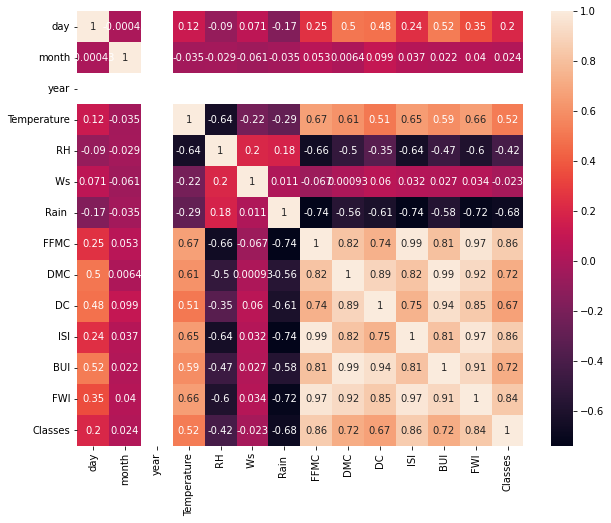

In [62]:
#For Duplicate data
plt.figure(figsize=(10,8))
sns.heatmap(Algeria_df.corr(method="spearman"),annot=True)

- Observations:
     1. Year has only one value which is 2012 so it can be drop 
     2. We can use FFMC,DC,ISI,BUI,FWI to Predict the Zero values of Rain.
     3. There is Strong Relations in Last 6 feature (FFMC,DC,ISI,BUI,FWI) removing some Co-relation 
         will improve the performence of Model

<AxesSubplot:xlabel='month,Classes'>

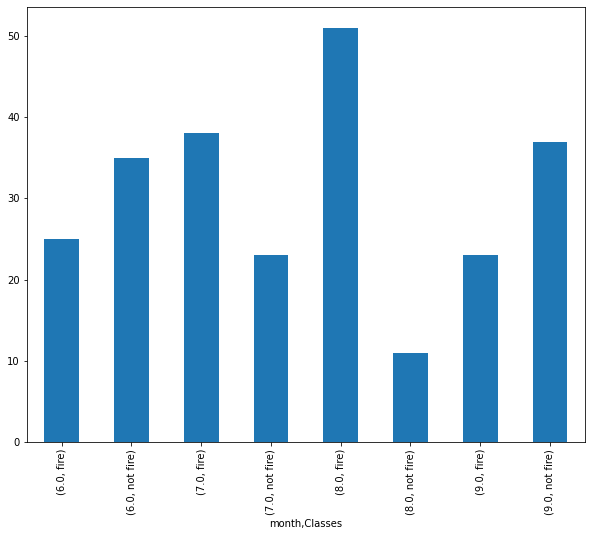

In [36]:
Algeria_df.groupby(["month","Classes"]).count()["BUI"].plot(kind="bar", figsize=(10,8))

- Observation:
    1. July and Augest has Higest rate of Fire due to warm climatic conditions.
    2. Arund 50 time in Augest Fire case is Observed which is Maximum in other months.
 

In [44]:
Algeria_df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [53]:
rain_10 = Algeria_df["Rain "] + 10

In [54]:
# Relatonship Between Temprature, Humidity and Wind Speed
pty.scatter_3d(Algeria_df, "Temperature", " RH", " Ws", color="Classes", size=rain_10)

- Observations:
    1. Temprature and fire has direct relation. More the temprature More no. of Fire case.
    2. Humidity and Temprature Combined play very Crucial Role in determining Fire in Forest.
    3. If Humidity is less there is high chance of Getting Fire in Forest
    4. Slower wind Speed help in Fire Incident in Forest

In [64]:
#Relationship Between Fire Weather Index, Fine Fuel Moisture Code and Initial Spread Index
pty.scatter_3d(Algeria_df, "FFMC", "FWI", "ISI", color="Classes", size=rain_10)

- Observatios:
    1. Fine Fuel Moisture Code(FFMC) Plays very important Factor in forest Fire. After 80 unit Chances of Caughting Fire increased by 100%
    2. FWI and ISI has Direct Relation with each Other.

In [65]:
#Relationship Between Buildup Index, Fire Weather Index and Duff Moisture Code
pty.scatter_3d(Algeria_df, "DMC", "FWI", "BUI", color="Classes", size=rain_10)

- Observations:
    1. If FWI is more then 5 Then chances of Forest fire raise upto 100%
    2. FWI, DMC and BUI are Directly Co-related Linearly.

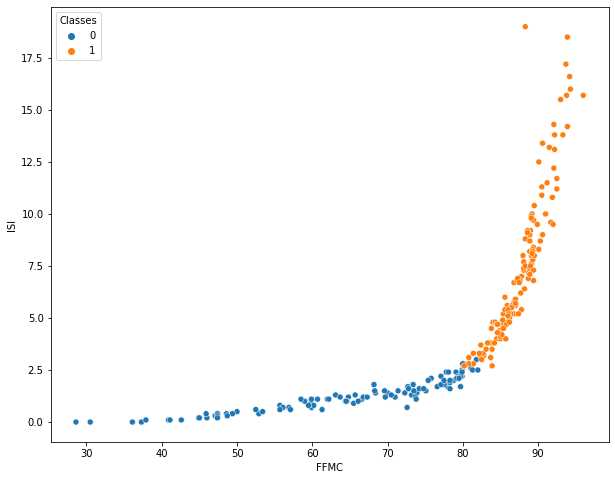

In [72]:
# Plotting 2d Graph using FFMC and ISI
plt.figure(figsize=(10,8))
sns.scatterplot(x=Algeria_df["FFMC"], y = Algeria_df["ISI"], hue=Algeria_df["Classes"] );

 - Observations:
     1. Only Two Feature required for Predicting output.
     2. Still Scaling other Feature

<Figure size 720x576 with 0 Axes>

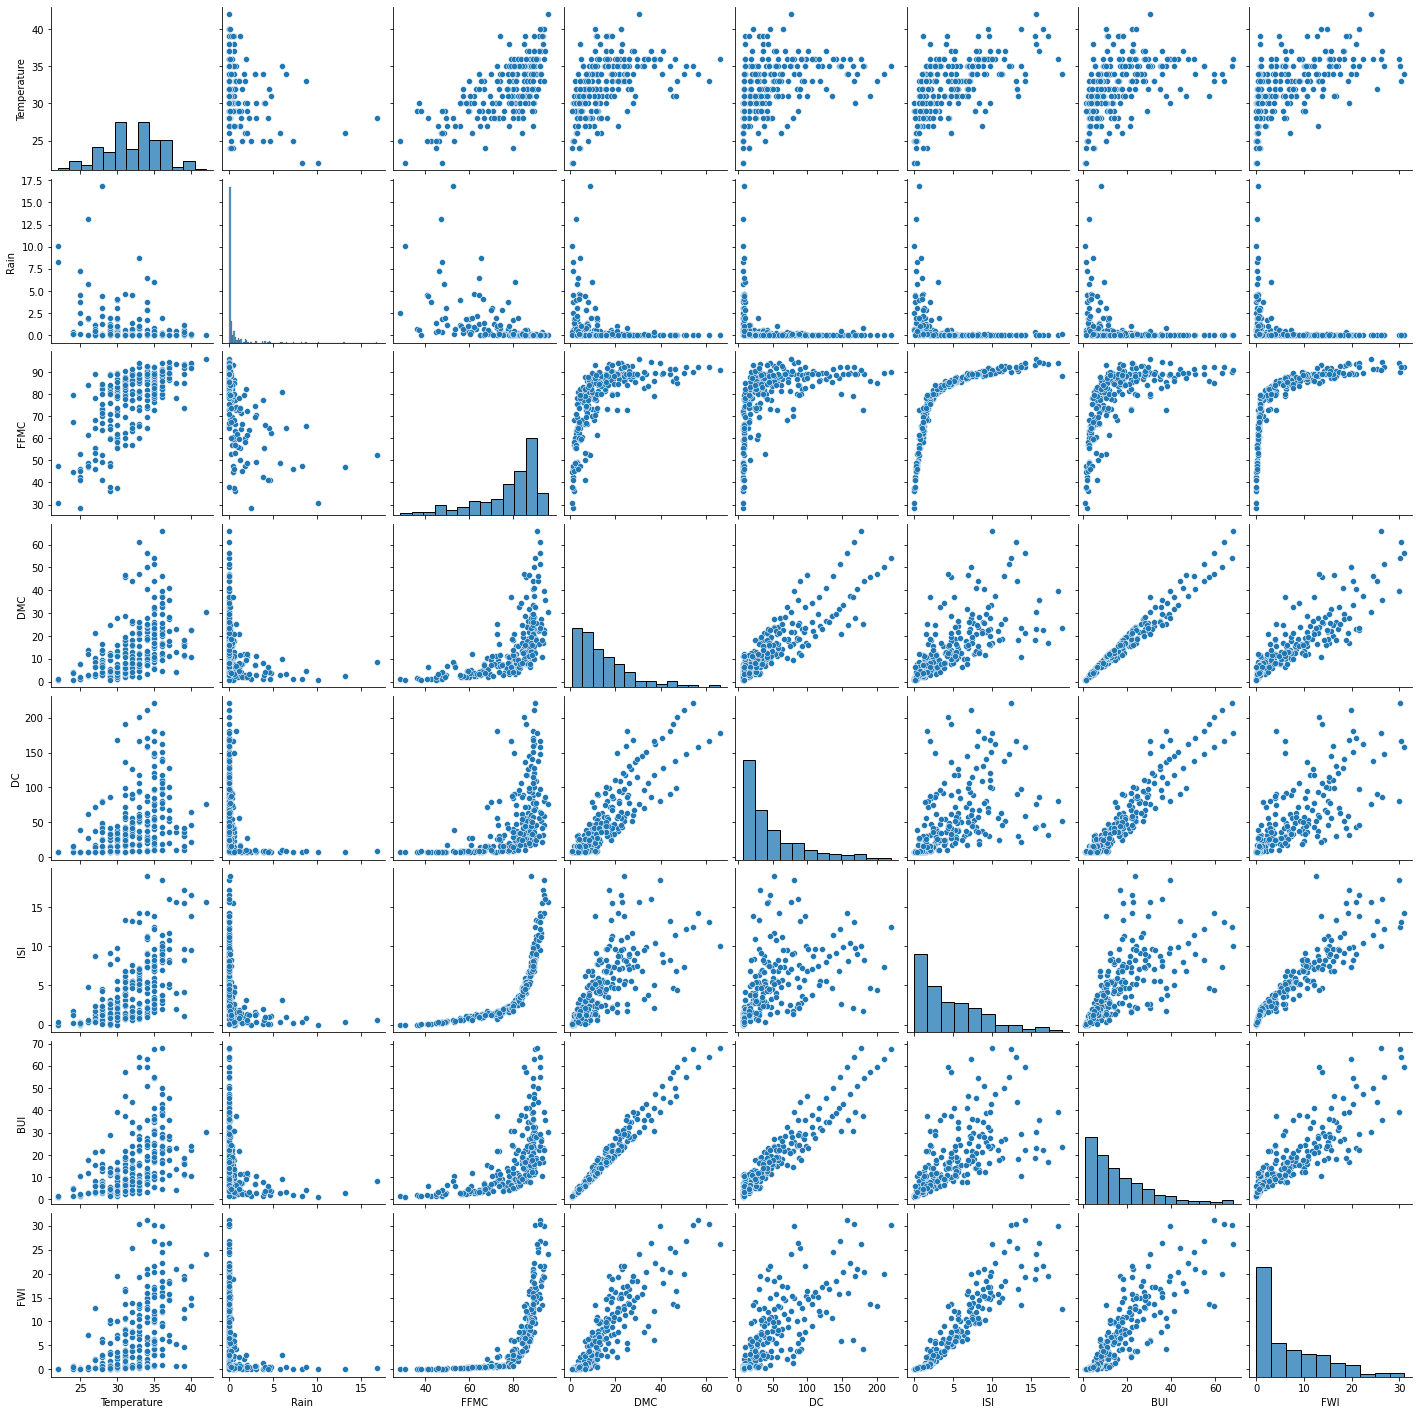

In [78]:
# Plotting 2d Graph using FFMC and ISI
plt.figure(figsize=(10,8))
sns.pairplot(Algeria_df.loc[:,['Temperature', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]);

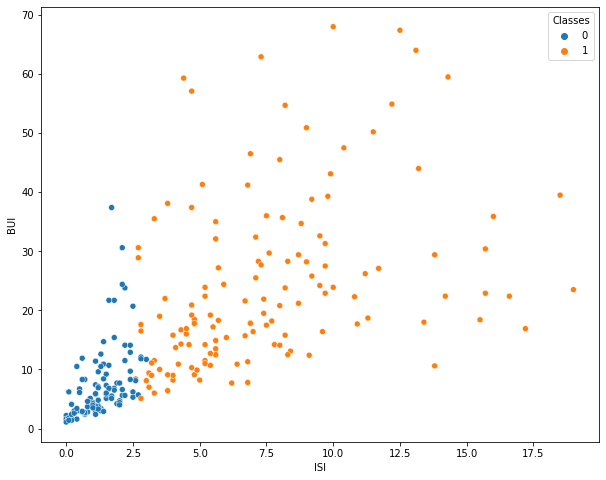

In [86]:
# Plotting 2d Graph using FFMC and ISI
plt.figure(figsize=(10,8))
sns.scatterplot(x=Algeria_df["ISI"], y = Algeria_df["BUI"], hue=Algeria_df["Classes"] );

<AxesSubplot:>

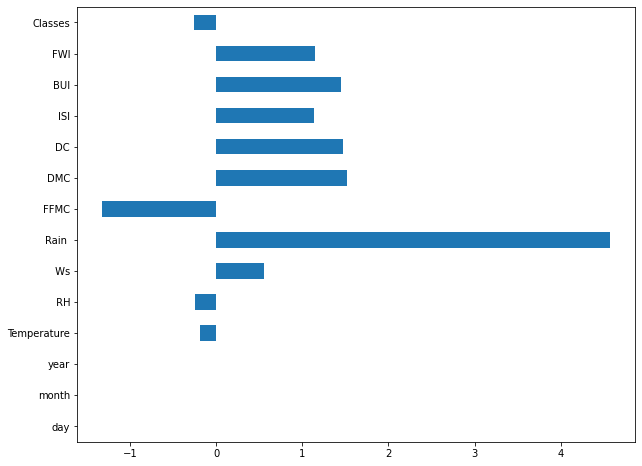

In [68]:
#Checking Skewness 
Algeria_df.skew().plot(kind="barh", figsize=(10,8))

 - Observations:
     1. Rain is Highley Right Skew Lograthemic Transformation required
     2. FWI, BUI, ISI, DC, DMC and Rain Features are Right Skew.
     3. Only FFMC is Left Skewed so Taking Square or sqrt will solved The Problem 